In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import patches
import seaborn as sns
sns.set_theme()
import pandas as pd
import mne
from scipy.fftpack import fft
from numpy.fft import rfft, irfft, rfftfreq

In [315]:
def load_light_amp_temp_function(light_amp, meta, classes, stim_duration=4, filter=False, sfreq = 1568):
    trials = meta[1:,:2]
    # times = meta[:,2]
    times = meta[1:,2] - 0.05
    # times = (times - times[0])[1:]
    # stim_end = int(stim_duration * sfreq + 0.75*sfreq)
    stim_end = int(stim_duration * sfreq)
    # light_amp['time'] = light_amp['time'] - light_amp['time'].iloc[0]
    # light_amp = np.array([light_amp.loc[light_amp['time']>t].drop(columns=['time']).to_numpy()[:stim_end].T for t in times])[:,:,int(0.75*sfreq):]
    light_amp = np.array([light_amp.loc[light_amp['time']>=t+0.07].drop(columns=['time']).to_numpy()[:stim_end].T for t in times]) # 0.07 might be due to the serial port delay
    if filter:
        light_amp = mne.filter.filter_data(light_amp, sfreq=sfreq, l_freq=5, h_freq=49, verbose=0, method='fir')
    light_amp_temp = []
    for i in range(len(classes)):
        light_amp_temp.append([])
    for i,freq in enumerate(trials):
        for j,target in enumerate(classes):
            if (freq==target).all():
                light_amp_temp[j].append(light_amp[i])
    light_amp = np.array(light_amp_temp).transpose(1,0,2,3)
    return light_amp

In [3]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/center_10-5/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False)
target_by_trial = [list(target_tab.keys())] * 5
light_amp.shape, np.array(target_by_trial).shape

NameError: name 'pd' is not defined

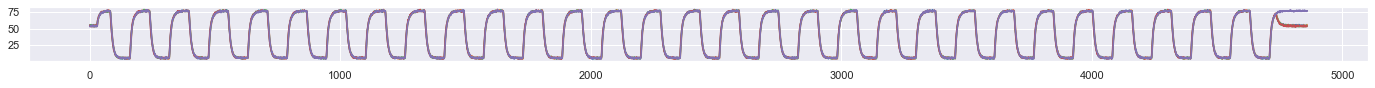

In [31]:
plt.figure(figsize=(24, 1))
plt.plot(light_amp[0,0,0,:])
plt.plot(light_amp[1,0,0,:])
plt.plot(light_amp[2,0,0,:])
plt.plot(light_amp[3,0,0,:])
plt.plot(light_amp[4,0,0,:])

In [34]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/keyboard9-5_10-5/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False)
target_by_trial = [list(target_tab.keys())] * 5
light_amp.shape, np.array(target_by_trial).shape

((5, 1, 1, 4860), (5, 1, 2))

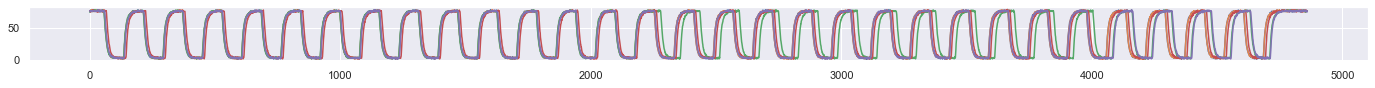

In [35]:
plt.figure(figsize=(24, 1))
plt.plot(light_amp[0,0,0,:])
plt.plot(light_amp[1,0,0,:])
plt.plot(light_amp[2,0,0,:])
plt.plot(light_amp[3,0,0,:])
plt.plot(light_amp[4,0,0,:])

In [38]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/keyboard9-5_10-5_3/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False)
target_by_trial = [list(target_tab.keys())] * 5
light_amp.shape, np.array(target_by_trial).shape

((5, 1, 1, 4860), (5, 1, 2))

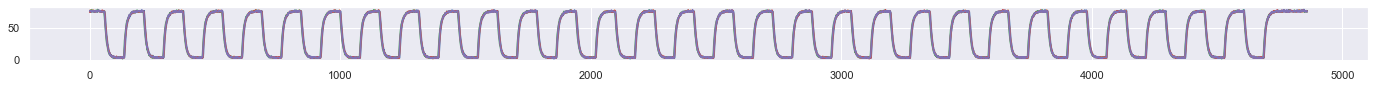

In [39]:
plt.figure(figsize=(24, 1))
plt.plot(light_amp[0,0,0,:])
plt.plot(light_amp[1,0,0,:])
plt.plot(light_amp[2,0,0,:])
plt.plot(light_amp[3,0,0,:])
plt.plot(light_amp[4,0,0,:])

In [40]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/keyboard9-5_15-5/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False)
target_by_trial = [list(target_tab.keys())] * 5
light_amp.shape, np.array(target_by_trial).shape

((5, 1, 1, 4860), (5, 1, 2))

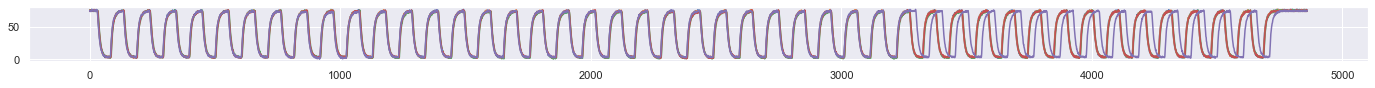

In [41]:
plt.figure(figsize=(24, 1))
plt.plot(light_amp[0,0,0,:])
plt.plot(light_amp[1,0,0,:])
plt.plot(light_amp[2,0,0,:])
plt.plot(light_amp[3,0,0,:])
plt.plot(light_amp[4,0,0,:])

In [80]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/keyboard9-5_15-5_7/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False)
target_by_trial = [list(target_tab.keys())] * 45
light_amp.shape, np.array(target_by_trial).shape

((45, 1, 1, 4860), (45, 1, 2))

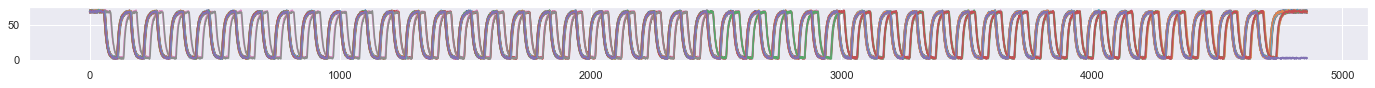

In [83]:
plt.figure(figsize=(24, 1))
for i in range(45):
    plt.plot(light_amp[i,0,0,:])

In [95]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/center_15-5_3/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False)
target_by_trial = [list(target_tab.keys())] * 45
light_amp.shape, np.array(target_by_trial).shape

((45, 1, 1, 4860), (45, 1, 2))

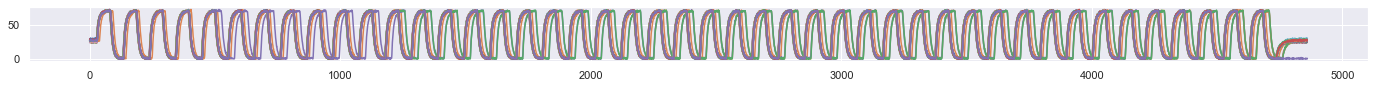

In [96]:
plt.figure(figsize=(24, 1))
for i in range(45):
    plt.plot(light_amp[i,0,0,:])

In [320]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/keyboard9-9_15-5_12/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False)
target_by_trial = [list(target_tab.keys())] * 45
light_amp.shape, np.array(target_by_trial).shape

((20, 1, 1, 4860), (45, 1, 2))

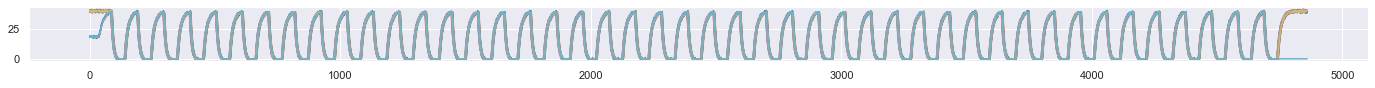

In [321]:
plt.figure(figsize=(24, 1))
# for i in [0,1,2,4,7,8,9,10,11,13,14,16,17,18,19]:
# for i in [0,3,4,8,9,10,12,17,18,19]:
for i in range(20):
    plt.plot(light_amp[i,0,0,:])

In [128]:
def load_light_amp_temp_function(light_amp, meta, classes, stim_duration=4, filter=False, sfreq = 1568):
    trials = meta[1:,:2]
    # times = meta[:,2]
    times = meta[1:,2] - 0.02
    # times = (times - times[0])[1:]
    # stim_end = int(stim_duration * sfreq + 0.75*sfreq)
    stim_end = int(stim_duration * sfreq)
    # light_amp['time'] = light_amp['time'] - light_amp['time'].iloc[0]
    # light_amp = np.array([light_amp.loc[light_amp['time']>t].drop(columns=['time']).to_numpy()[:stim_end].T for t in times])[:,:,int(0.75*sfreq):]
    light_amp = np.array([light_amp.loc[light_amp['time']>=t+0.07].drop(columns=['time']).to_numpy()[:stim_end].T for t in times]) # 0.07 might be due to the serial port delay
    if filter:
        light_amp = mne.filter.filter_data(light_amp, sfreq=sfreq, l_freq=5, h_freq=49, verbose=0, method='fir')
    light_amp_temp = []
    for i in range(len(classes)):
        light_amp_temp.append([])
    for i,freq in enumerate(trials):
        for j,target in enumerate(classes):
            if (freq==target).all():
                light_amp_temp[j].append(light_amp[i])
    light_amp = np.array(light_amp_temp).transpose(1,0,2,3)
    return light_amp

In [300]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/keyboard32-32_15-5_55/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False, sfreq=sfreq)
target_by_trial = [list(target_tab.keys())] * 20
light_amp.shape, np.array(target_by_trial).shape

((20, 1, 1, 4860), (20, 1, 2))

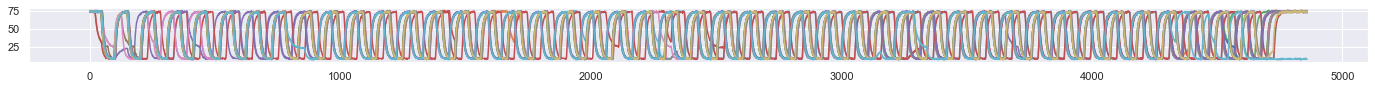

In [303]:
plt.figure(figsize=(24, 1))
# for i in [0,2,3,4,5,7,9,10,11,12,13,14,15,16,17,18,19]:
# for i in [5,14,17]:
# for i in [0,3,10,11,17,18,19]:
# for i in [0,6,8,11,12,15,17]:
for i in range(20):
    plt.plot(light_amp[i,0,0,:])

# plt.plot(light_amp[2,0,0,:])
# plt.plot(light_amp[11,0,0,:])
# plt.plot(light_amp[14,0,0,:])
# plt.plot(light_amp[10,0,0,:])
# plt.plot(light_amp[12,0,0,:])


In [154]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/keyboard32-15_15-5/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False, sfreq=sfreq)
target_by_trial = [list(target_tab.keys())] * 45
light_amp.shape, np.array(target_by_trial).shape

((45, 1, 1, 4860), (45, 1, 2))

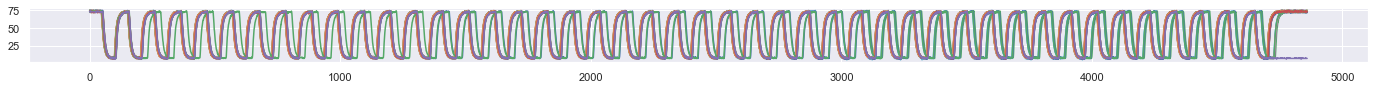

In [155]:
plt.figure(figsize=(24, 1))
for i in range(45):
    plt.plot(light_amp[i,0,0,:])

In [164]:
target_tab = {}
# data_path = "../data/photosensor_recordings/pilot_data/5-30-22_run5/"
data_path = "../data/photosensor_recordings/pilot_data/9-key_layout_1/keyboard32-9_15-5_2/"
sfreq = 1568
duration = 3.1
light_amp = pd.read_csv(data_path + 'light_amp.csv').astype(float)
# light_amp['time'] *= 1e-6
meta = np.loadtxt(data_path + 'meta.csv', delimiter=',', dtype=float)
trials = meta[1:,:2]
classes = np.unique(trials, axis=0)
more_targets = {tuple(target):index for index,target in enumerate(classes)}
target_tab.update(more_targets)
light_amp = load_light_amp_temp_function(light_amp, meta, classes, stim_duration=duration,filter=False, sfreq=sfreq)
target_by_trial = [list(target_tab.keys())] * 45
light_amp.shape, np.array(target_by_trial).shape

((45, 1, 1, 4860), (45, 1, 2))

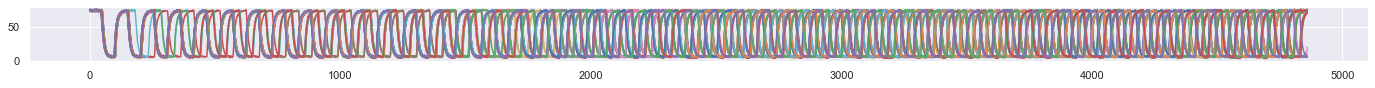

In [165]:
plt.figure(figsize=(24, 1))
for i in range(45):
    plt.plot(light_amp[i,0,0,:])